# Creating Dataset for reviews

In [ ]:
import json

In [2]:
yelp_academic_dataset_business="review.json"
reviews=[]
with open(yelp_academic_dataset_business) as infile:
    for line in infile:
        reviews.append(line)

In [3]:
len(reviews)

1022264

In [4]:
reviews[0]

'{"business_id":"iCQpiavjjPzJ5_3gPD5Ebg","cool":0,"date":"2011-02-25","funny":0,"review_id":"x7mDIiDB3jEiPGPHOmDzyw","stars":2,"text":"The pizza was okay. Not the best I\'ve had. I prefer Biaggio\'s on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio\'s is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say...","useful":0,"user_id":"msQe1u7Z_XuqjGoqhB0J5g"}\n'

In [5]:
import ast

In [6]:
reviews_train={}
reviews_test={}
for i in range(0,len(reviews)):
    
    r=reviews[i]
    if(r.find("null") == -1):
        e=ast.literal_eval(r)
        if e['date']>"2017-01-01":
            reviews_test[e['review_id']]=e
        else:
            reviews_train[e['review_id']]=e
#         if e['business_id'] in b_dict:
#             b_dict[e['business_id']].add(e['user_id'])
#         else:
#             b_dict[e['business_id']]=set()
#             b_dict[e['business_id']].add(e['user_id'])
#         if e['user_id'] in u_dict:
#             u_dict[e['user_id']].add(e['business_id'])
#         else:
#             u_dict[e['user_id']]=set()
#             u_dict[e['user_id']].add(e['business_id'])
       
        

In [7]:
len(reviews_test)
len(reviews_train)

766064

In [8]:
b_dict={}
u_dict={}

for k,e in reviews_train.items():
    if e['business_id'] in b_dict:
        b_dict[e['business_id']].add(e['user_id'])
    else:
        b_dict[e['business_id']]=set()
        b_dict[e['business_id']].add(e['user_id'])
    if e['user_id'] in u_dict:    
        u_dict[e['user_id']].add(e['business_id'])
    else:
        u_dict[e['user_id']]=set()
        u_dict[e['user_id']].add(e['business_id'])

In [9]:
b_dict_test={}
u_dict_test={}

for k,e in reviews_test.items():
    if e['business_id'] in b_dict_test:
        b_dict_test[e['business_id']].add(e['user_id'])
    else:
        b_dict_test[e['business_id']]=set()
        b_dict_test[e['business_id']].add(e['user_id'])
    if e['user_id'] in u_dict_test:    
        u_dict_test[e['user_id']].add(e['business_id'])
    else:
        u_dict_test[e['user_id']]=set()
        u_dict_test[e['user_id']].add(e['business_id'])

In [244]:
len(u_dict_test)

158345

In [12]:
import numpy as np

In [12]:
# np.save('b_dict.npz', b_dict) 
# np.save('u_dict.npz', u_dict) 

In [11]:
# b=list(b_dict.keys())
# recommendation_b={}
# for i in range(0,len(b_dict.keys())):
#     print(i)
#     for j in range(i+1,len(b_dict.keys())):
#         intersection=b_dict[b[i]].intersection(b_dict[b[j]])
#         if len(intersection)>100:
#             diff1=b_dict[b[i]].difference(b_dict[b[j]])
#             if b[j] in recommendation_b:
#                 recommendation_b[b[j]]=recommendation_b[b[j]].union(diff1)
#             else:
#                 recommendation_b[b[j]]=set()
#                 recommendation_b[b[j]]=recommendation_b[b[j]].union(diff1)
#             diff2=b_dict[b[j]].difference(b_dict[b[i]])
#             if b[i] in recommendation_b:
#                 recommendation_b[b[i]]=recommendation_b[b[i]].union(diff2)
#             else:
#                 recommendation_b[b[i]]=set()
#                 recommendation_b[b[i]]=recommendation_b[b[i]].union(diff2)
            
            

In [15]:
# len(recommendation_b[list(recommendation_b.keys())[10]])
# len(recommendation_b)

271

# Saving Dataset into pickle format

In [13]:
import pickle
with open('b_dict_train.pickle', 'wb') as handle:
    pickle.dump(b_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('b_dict_train.pickle', 'rb') as handle:
    bt = pickle.load(handle)
    
with open('u_dict_train.pickle', 'wb') as handle:
    pickle.dump(u_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('u_dict_train.pickle', 'rb') as handle:
    ut = pickle.load(handle)

In [14]:
with open('b_dict_test.pickle', 'wb') as handle:
    pickle.dump(b_dict_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('b_dict_test.pickle', 'rb') as handle:
    bt_test = pickle.load(handle)
    
with open('u_dict_test.pickle', 'wb') as handle:
    pickle.dump(u_dict_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('u_dict_test.pickle', 'rb') as handle:
    ut_test = pickle.load(handle)

In [15]:
bt['iCQpiavjjPzJ5_3gPD5Ebg']

{'Mq2vvgs1khvGzaS3LvNkPQ',
 '1_DpsYraC_NcqshYV2nMJQ',
 'v1gcItZPKsCo0C1ELnjmgA',
 'CJDFWY5R6rh6pB7hL_B2xw',
 'n6L1yaKhuuenNdvwwxJxhg',
 'QD4V4KfC7QfNIrvce0fHhA',
 'ehaAB43VrvWui7GDlMjM0Q',
 'BHmuQwM2PNBbLJKyAB4Tsw',
 'W6R3QVtF_-DrstNG6WtNmA',
 'fC7sAY-qowfX0uf1kIYIyQ',
 'wc4XAA5pC3b1UgooSypHwA',
 'sXLAy83l7EwdZjsYFbaq0A',
 '70B6_RstTKNJ_32Tz_F95w',
 'RTcuhbxDIWFBUN335JPhsw',
 '3A7qTai823AkGHqmQ844ug',
 'dIHHaoF-yyIvBFEOyEQ8Pw',
 '40m0541Z_KexYkdvvqHJIQ',
 '5Nw0aCrXmFlrpoWBCAJ-ig',
 'Qj2a9IsVG1hUs0mPhZOG4g',
 'uQbuIj-FHEJ5QHaWDabiNw',
 '2XFQXe_Ewzj1VA0PiEHG_A',
 'F8oWlo3e5k1fNWmNMvrP6Q',
 'K_yjrrDZBSic30Gr-dopqA',
 'snDjs1hdh7JOWv4jjbXPDw',
 'Qdqhuz60PTdSsIjJk2_TXg',
 'hi_jhOcJmxWmFGgkvmTyNg',
 'XsJRKMZL3tnvETbtsQ69gg',
 'Ehuh1mI2S02L-Mv08sg82Q',
 '2GUjO7NU88cPXpoffYCU8w',
 'dQu_t4PLIAElI854eq3qvw',
 'BdV-cf3LScmb8kZ7iiBcMA',
 'kDgyvaMAg-2DokcEi6A_zQ',
 'HL3h_SsXhVHPRF5T1WB2gA',
 'Pa0tNRZ4HKu8Z4NDEK5EVw',
 'XyML-KN85aIx6CGsrBTiIA',
 'Dd6ElS2Cng3Qag_h4IQC-Q',
 '7LdHbcbVImxsnRFjWooYkQ',
 

# Creating the Graph

In [16]:
import networkx as nx

In [17]:
G=nx.Graph()

In [18]:
G.add_nodes_from(list(bt.keys()))

In [19]:
G.add_nodes_from(list(ut.keys()))

In [20]:
b=list(bt.keys())
for i in range(0,len(bt.keys())):
    bu=bt[b[i]]
    for f in bu:
        G.add_edge(f,b[i])

In [21]:
G.number_of_nodes()

338386

In [22]:
G.number_of_edges()

766064

In [23]:
# Calcultaing Pagerank
pr = nx.pagerank(G, alpha=0.8,max_iter=200)

In [200]:
# Experiment 1
b=list(b_dict.keys())
user_test=set(list(u_dict_test.keys()))
recommendation_b2={}
for i in range(0,len(b_dict.keys())):
    print(i)
    for j in range(i+1,len(b_dict.keys())):
        
        intersection=b_dict[b[i]].intersection(b_dict[b[j]])
        
        if len(intersection)>500:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            if b[j] in recommendation_b2 :
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=5#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=5#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=5#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=5#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=5#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=5#len(intersection)
        elif len(intersection)>100:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=1#len(intersection)
            else:
                
                recommendation_b2[b[j]]={}
                for m in diff1:
                    
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=1#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=1#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=1/2#len(intersection)
        elif len(intersection)>50:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=1/2#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=1/2#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=1/2#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=1/2#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=1/2#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=1/2#len(intersection)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [201]:
cross_pagerank_precision_1=[]
pagerank_precision_1=[]
cross_pagerank_recall_1=[]
pagerank_recall_1=[]

In [202]:
def a1(lk):
    # Precision (Pagerank, Cross Recommendation, 4 splits, )
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(b_dict_test[b])

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    print(s,n)
    print(s1,n1)
    print(n1/(n+n1))       
    cross_pagerank_precision_1.append(n1/(n1+n))
    # Recall (Pagerank, Cross Recommendation, 4 splits)
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(b_dict_test[b])

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    print(s,n)
    print(s1,n1)
    print(n1/(n+n1)) 
    cross_pagerank_recall_1.append(n1/(n1+n))

In [203]:
a1(4)
a1(3)
a1(2)
a1(1)
a1(0)

479089 545
154295 165
0.2323943661971831
57148 97
576236 613
0.8633802816901408
405751 469
227633 241
0.33943661971830985
46421 78
586963 632
0.8901408450704226
318506 378
314878 332
0.4676056338028169
33070 54
600314 656
0.923943661971831
204455 257
428929 453
0.6380281690140845
20475 31
612909 679
0.956338028169014
87967 115
545417 595
0.8380281690140845
10747 14
622637 696
0.9802816901408451


# Only Pagerank

In [204]:
def b1(lk):
    # Precision (Pagerank, 3 splits)
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(b_dict_test[b])

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    print(s,n)
    print(s1,n1)
    print(n1/(n+n1))       
    pagerank_precision_1.append(n1/(n1+n))
    # Recall (Pagerank, 3 splits)
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(b_dict_test[b])

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    print(s,n)
    print(s1,n1)
    print(n1/(n+n1))    
    pagerank_recall_1.append(n1/(n1+n))

In [205]:
pagerank_precision_1=[]
pagerank_recall_1=[]

In [206]:
for i in range(4,-1,-1):
    b1(i)

554259 596
79125 114
0.16056338028169015
57148 97
576236 613
0.8633802816901408
496552 532
136832 178
0.2507042253521127
46421 78
586963 632
0.8901408450704226
408314 438
225070 272
0.38309859154929576
33070 54
600314 656
0.923943661971831
272098 300
361286 410
0.5774647887323944
20475 31
612909 679
0.956338028169014
131273 149
502111 561
0.7901408450704225
10747 14
622637 696
0.9802816901408451


In [242]:
import pandas as pd
dfd=pd.read_json(yelp_academic_dataset_business,lines=True)

KeyboardInterrupt: 

In [207]:
# Experiment 2
b=list(b_dict.keys())
user_test=set(list(u_dict_test.keys()))
recommendation_b2={}
for i in range(0,len(b_dict.keys())):
    print(i)
    for j in range(i+1,len(b_dict.keys())):
        
        intersection=b_dict[b[i]].intersection(b_dict[b[j]])
        
        if len(intersection)>1000:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            if b[j] in recommendation_b2 :
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=150#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=150#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=150#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=150#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=150#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=150#len(intersection)
        elif len(intersection)>500:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            if b[j] in recommendation_b2 :
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=50#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=50#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=50#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=50#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=50#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=50#len(intersection)
        elif len(intersection)>100:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=15#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=15#len(intersection)
            else:
                
                recommendation_b2[b[j]]={}
                for m in diff1:
                    
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=15#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=15#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=15#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=15#len(intersection)
        elif len(intersection)>50:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=1#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=1#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=1#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=1#len(intersection)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [208]:
cross_pagerank_precision_2=[]
pagerank_precision_2=[]
cross_pagerank_recall_2=[]
pagerank_recall_2=[]

In [209]:
bussiness=set(recommendation_b2.keys()).intersection(set(b_dict_test.keys()))
len(bussiness)

710

In [210]:
# Precision (Pagerank, Cross Recommendation, 4 splits, >5)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>5:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1

1 100 135
1 100 108
3 100 288
1 100 106
7 100 339 ------
8 100 182 ------
10 100 685 ------
12 100 133 ------
1 100 125
3 100 170
1 100 44
0 100 1
2 100 360
1 100 226
0 100 28
2 100 242
2 100 111
4 100 589
2 100 128
1 100 160
3 100 660
0 100 1
1 100 112
3 100 139
3 100 327
1 100 85
2 100 154
0 100 216
0 100 42
0 100 1
0 100 62
7 100 182 ------
0 100 159
5 100 143
4 100 146
2 100 279
1 100 218
1 100 220
0 100 160
2 100 751
3 100 228
18 100 374 ------
2 100 228
2 100 168
4 100 636
3 100 207
1 100 203
2 100 272
3 100 464
1 100 136
0 100 211
2 100 162
5 100 381
6 100 649 ------
0 100 1
7 100 754 ------
5 100 1135
10 100 2269 ------
0 100 1
3 100 235
0 100 187
9 100 173 ------
2 100 145
3 100 223
0 100 248
7 100 111 ------
3 100 134
2 100 286
1 100 238
4 100 206
2 100 290
2 100 328
19 100 204 ------
4 100 234
2 100 164
5 100 175
3 100 356
2 100 358
1 100 113
9 100 166 ------
0 100 223
1 100 176
2 100 146
4 100 77
4 100 270
3 100 139
5 100 296
5 100 129
1 100 112
4 100 490
0 100 201
0 100 11

In [211]:
print(s,n)
print(s1,n1)

517192 586
116192 124


In [212]:
n1/(n+n1)

0.17464788732394365

In [213]:
# Recall (Pagerank, Cross Recommendation, 4 splits, >5)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>5:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1

9 840 135 ------
9 782 108 ------
26 961 288 ------
3 761 106
38 753 339 ------
14 279 182 ------
153 12589 685 ------
18 411 133 ------
7 637 125 ------
10 692 170 ------
4 7449 44
0 1364 1
28 4479 360 ------
6 638 226 ------
2 3268 28
9 263 242 ------
6 1208 111 ------
97 10729 589 ------
3 515 128
21 5887 160 ------
43 2450 660 ------
1 2760 1
11 3649 112 ------
7 1683 139 ------
32 7294 327 ------
12 2486 85 ------
40 3647 154 ------
27 7733 216 ------
9 4905 42 ------
0 9978 1
11 2444 62 ------
18 274 182 ------
3 809 159
11 372 143 ------
19 1080 146 ------
65 7724 279 ------
3 254 218
27 4665 220 ------
28 6377 160 ------
83 10530 751 ------
47 5865 228 ------
49 381 374 ------
32 5886 228 ------
28 6914 168 ------
88 3576 636 ------
27 1871 207 ------
6 248 203 ------
7 482 272 ------
60 6938 464 ------
5 875 136
33 8857 211 ------
3 229 162
46 4373 381 ------
96 4754 649 ------
0 1319 1
131 11593 754 ------
139 8904 1135 ------
435 16965 2269 ------
0 3621 1
25 3736 235 ------

38 11272 184 ------
9 405 233 ------
11 1316 216 ------
14 282 117 ------
22 2353 280 ------
12 143 401 ------
31 4471 241 ------
17 285 119 ------
7 260 406 ------
144 13007 560 ------
61 501 494 ------
15 4326 92 ------
4 902 189
34 9264 137 ------
2 248 190
5 175 213
2 790 123
31 5577 216 ------
10 923 272 ------
28 7338 94 ------
10 718 171 ------
3 301 134
76 9221 608 ------
28 4455 345 ------
4 376 265
2 269 149
11 879 217 ------
16 2675 117 ------
73 4699 403 ------
7 270 183 ------
5 1006 127
7 241 600 ------
7 120 170 ------
25 637 133 ------
4 2992 67
9 289 136 ------
13 4278 224 ------
22 3974 166 ------
12 1434 128 ------
84 6485 391 ------
18 467 324 ------
3 1036 209
5 160 301
9 516 196 ------
5 197 195
30 3844 145 ------
74 11802 436 ------
12 815 117 ------
32 2911 134 ------
1 395 43
36 5140 132 ------
9 195 195 ------
7 362 164 ------
20 2231 195 ------
69 4547 306 ------
1 1565 3
59 7870 376 ------
6 195 167 ------
20 1318 200 ------
36 1168 348 ------
70 4269 430 --

In [214]:
print(s,n)
print(s1,n1)
n1/(n+n1)

68466 119
564918 591


0.8323943661971831

In [215]:
# Precision (Pagerank, Cross Recommendation, 4 splits, >4)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>4:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
cross_pagerank_precision_2.append(n1/(n+n1))        
# Recall (Pagerank, Cross Recommendation, 4 splits, >4)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>4:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1)) 
cross_pagerank_recall_2.append(n1/(n+n1))

456909 527
176475 183
0.2577464788732394
57148 97
576236 613
0.8633802816901408


In [216]:
# Precision (Pagerank, Cross Recommendation, 4 splits, >3)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>3:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
cross_pagerank_precision_2.append(n1/(n+n1))
# Recall (Pagerank, Cross Recommendation, 4 splits, >3)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>3:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1)) 
cross_pagerank_recall_2.append(n1/(n+n1))

386116 458
247268 252
0.35492957746478876
46421 78
586963 632
0.8901408450704226


In [217]:
lk=2
# Precision (Pagerank, Cross Recommendation, 4 splits, )
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
cross_pagerank_precision_2.append(n1/(n+n1))   
# Recall (Pagerank, Cross Recommendation, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1)) 
cross_pagerank_recall_2.append(n1/(n+n1))

319287 378
314097 332
0.4676056338028169
33070 54
600314 656
0.923943661971831


In [218]:
lk=1
# Precision (Pagerank, Cross Recommendation, 4 splits, )
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
cross_pagerank_precision_2.append(n1/(n+n1)) 
# Recall (Pagerank, Cross Recommendation, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1)) 
cross_pagerank_recall_2.append(n1/(n+n1))

201694 251
431690 459
0.6464788732394366
20475 31
612909 679
0.956338028169014


In [219]:
lk=0
# Precision (Pagerank, Cross Recommendation, 4 splits, )
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
cross_pagerank_precision_2.append(n1/(n+n1))
# Recall (Pagerank, Cross Recommendation, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1)) 
cross_pagerank_recall_2.append(n1/(n+n1))

81588 103
551796 607
0.8549295774647887
10747 14
622637 696
0.9802816901408451


# Only Pagerank

In [220]:
lk=4
# Precision (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
pagerank_precision_2.append(n1/(n+n1))       
# Recall (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))
pagerank_recall_2.append(n1/(n+n1))

554259 596
79125 114
0.16056338028169015
57148 97
576236 613
0.8633802816901408


In [221]:
lk=3
# Precision (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
pagerank_precision_2.append(n1/(n+n1))       
# Recall (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1)) 
pagerank_recall_2.append(n1/(n+n1))

496552 532
136832 178
0.2507042253521127
46421 78
586963 632
0.8901408450704226


In [222]:
lk=2
# Precision (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
pagerank_precision_2.append(n1/(n+n1))        
# Recall (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1)) 
pagerank_recall_2.append(n1/(n+n1))

408314 438
225070 272
0.38309859154929576
33070 54
600314 656
0.923943661971831


In [223]:
lk=1
# Precision (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
pagerank_precision_2.append(n1/(n+n1))        
# Recall (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1)) 
pagerank_recall_2.append(n1/(n+n1))

272098 300
361286 410
0.5774647887323944
20475 31
612909 679
0.956338028169014


In [224]:
lk=0
# Precision (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:100])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1))       
pagerank_precision_2.append(n1/(n+n1))       
# Recall (Pagerank, 4 splits)
correct=0
s=0
n=0
s1=0
n1=0
for b in bussiness:
    l=list(recommendation_b2[b].items())
    
    l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
    selected2=set(l[0:])
    selected=set()
    for r in selected2:
        selected.add(r[0])
    actual=set(b_dict_test[b])
    
    if len(selected.intersection(actual))>lk:#len(selected)/2:
        s1+=len(b_dict[b])
        n1+=1
        #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
        correct+=1
    else:
        s+=len(b_dict[b])
        #print(len(selected.intersection(actual)),len(selected),len(actual))
        n+=1
print(s,n)
print(s1,n1)
print(n1/(n+n1)) 
pagerank_recall_2.append(n1/(n+n1))

131273 149
502111 561
0.7901408450704225
10747 14
622637 696
0.9802816901408451


In [225]:
pagerank_precision_2

[0.16056338028169015,
 0.2507042253521127,
 0.38309859154929576,
 0.5774647887323944,
 0.7901408450704225]

In [226]:
cross_pagerank_precision_2

[0.2577464788732394,
 0.35492957746478876,
 0.4676056338028169,
 0.6464788732394366,
 0.8549295774647887]

In [227]:
import matplotlib.pyplot as plt

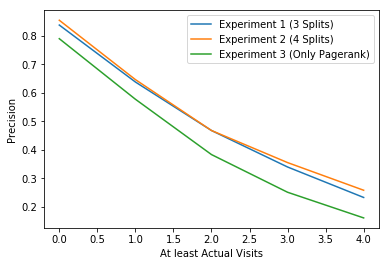

In [236]:
a,=plt.plot(cross_pagerank_precision_1[::-1],label="Experiment 1 (3 Splits)")
b,=plt.plot(cross_pagerank_precision_2[::-1],label="Experiment 2 (4 Splits)")
c,=plt.plot(pagerank_precision_1[::-1],label="Experiment 3 (Only Pagerank)")
plt.legend(handles=[a,b,c])
plt.ylabel("Precision")
plt.xlabel("At least Actual Visits")
plt.show()

In [239]:
print("At least Actual Users, Experiment 1, Experiment 2, Experiment 3 ")
for i in range(0,5):
    print(4-i,",",cross_pagerank_precision_1[i],",",cross_pagerank_precision_2[i],",",pagerank_precision_1[i])

At least Actual Users, Experiment 1, Experiment 2, Experiment 3 
4 , 0.2323943661971831 , 0.2577464788732394 , 0.16056338028169015
3 , 0.33943661971830985 , 0.35492957746478876 , 0.2507042253521127
2 , 0.4676056338028169 , 0.4676056338028169 , 0.38309859154929576
1 , 0.6380281690140845 , 0.6464788732394366 , 0.5774647887323944
0 , 0.8380281690140845 , 0.8549295774647887 , 0.7901408450704225


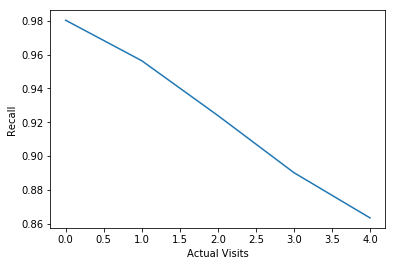

In [229]:
plt.plot(pagerank_recall_1[::-1])
plt.ylabel("Recall")
plt.xlabel("Actual Visits")
plt.show()